### Import Libraries

In [2]:
import pandas as pd
import numpy as np

### Import data

In [13]:
dataset = pd.read_csv('diabetes.csv')

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#..............Assigning X and Y variables...........#
x = dataset.drop(['Outcome'], axis=1)
y = np.array(dataset['Outcome']).reshape(-1,1)  #Acidic/Basic

In [25]:
#.............Split train and test sets..............#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=25)

<Axes: xlabel='Outcome', ylabel='count'>

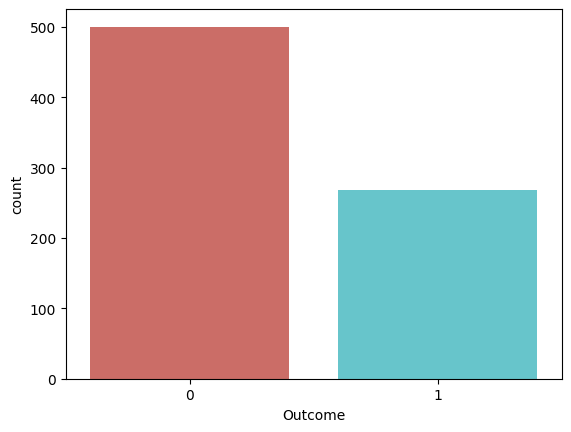

In [20]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='Outcome', data=dataset, palette='hls')

In [21]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [22]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='Glucose'>

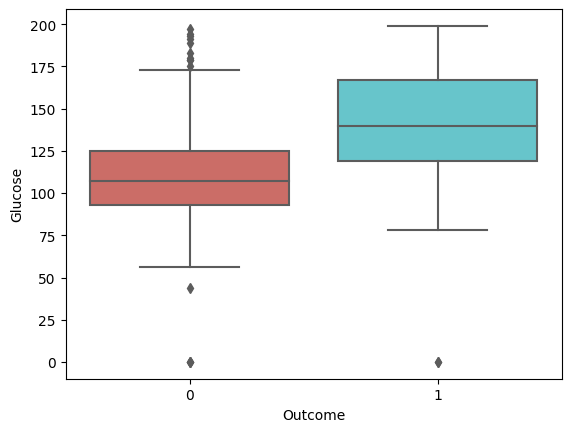

In [23]:
sns.boxplot(x='Outcome', y='Glucose', data=dataset, palette='hls')

<Axes: >

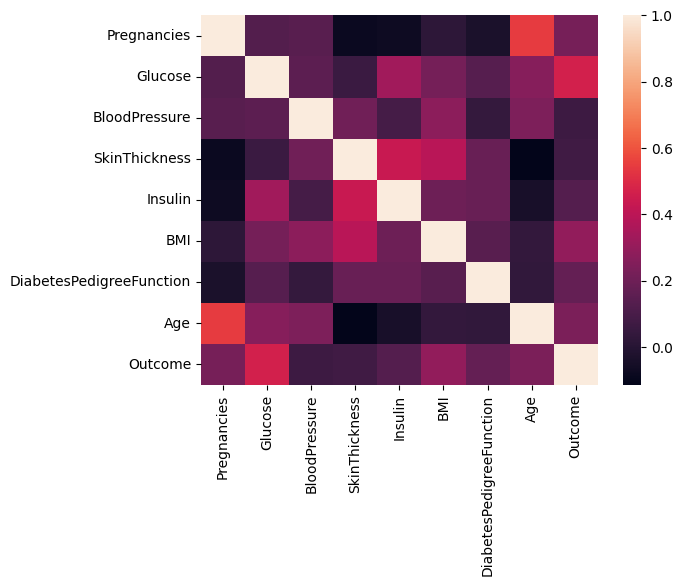

In [24]:
sns.heatmap(dataset.corr())

In [12]:
from classmodels import classifiers
my_instance = classifiers(x_train, x_test, y_train, y_test)
ypredll = my_instance.rf(x_train, x_test, y_train, y_test)

NameError: name 'train_test_split' is not defined

In [ ]:
def y_pred(x_train, x_test, y_train, y_test):
    from classmodels import classifiers
    # Create an instance of MyClass
    my_instance = classifiers(x_train, x_test, y_train, y_test)

    # List of method names you want to call
    methods_to_call = ['logreg', 'dt']
    #methods_to_call = ['lr', 'lasso','rf']

    tempY = []
    # Use a loop to call the methods
    for method_name in methods_to_call:
        # Use getattr to get the method by name and then call it
        method = getattr(my_instance, method_name)
        y_pred = method(x_train, x_test, y_train, y_test)[0]
        tempY.append(y_pred.reshape(-1, 1))

    tempY = np.hstack(tempY)  # Stack the column vectors horizontally
    predAll = pd.DataFrame(data=tempY, columns=methods_to_call)
    #temp = np.concatenate((y_test,temp),1)
    return(predAll)

In [ ]:
diagpredAll = y_pred(x_train, x_test, y_train, y_test)
diagpredAll

In [ ]:
diagpredAll.transpose()

In [ ]:
def scores(x_train, x_test, y_train, y_test):
    from classmodels import classifiers
    # Create an instance of MyClass
    my_instance = classifiers(x_train, x_test, y_train, y_test)
    scoreind = ['Accuracy', 'Sensitivity', 'Specificity', 'r2', 'Adj_R2']

    # List of method names you want to call
    methods_to_call = ['lr', 'lasso','ridge','en','llar','huber','br','gbr','etr','xgb','knn','ctb','lgbmr','dummy','par','dt','rf','svr']
    
    tempS = []
    # Use a loop to call the methods
    for method_name in methods_to_call:
        # Use getattr to get the method by name and then call it
        method = getattr(my_instance, method_name)
        scores = method(x_train, x_test, y_train, y_test)[1]
        tempS.append(scores.reshape(-1, 1))

    tempS = np.hstack(tempS)  # Stack the column vectors horizontally
    scoresAll = pd.DataFrame(data=tempS, columns=methods_to_call, index=scoreind)
    #temp = np.concatenate((y_test,temp),1)
    return(scoresAll)